<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/ClassParticipation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0


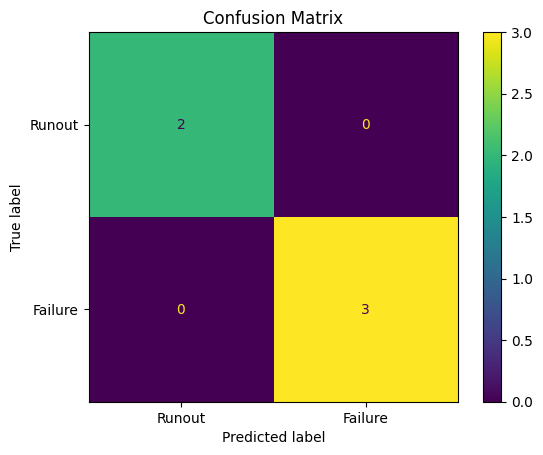

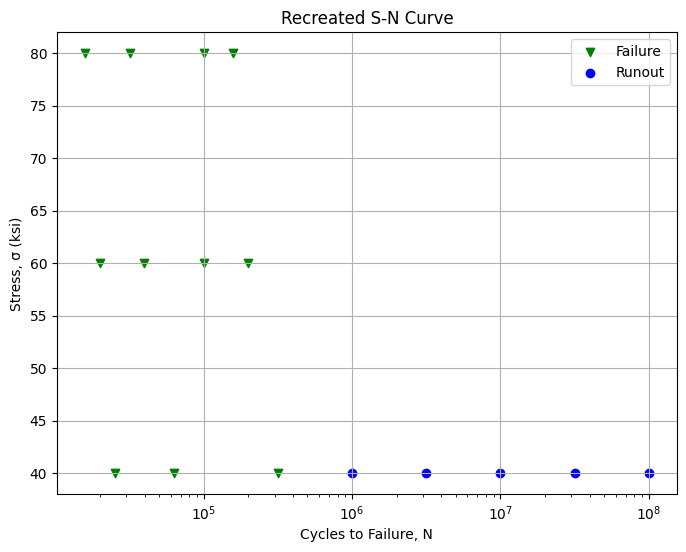

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Digitized data (approximate values based on the plot)
# Format: [Cycles_to_failure (log scale), Stress (ksi), Label (1 for failure, 0 for runout)]
data = [
    [4.2, 80, 1], [4.5, 80, 1], [5.0, 80, 1], [5.2, 80, 1],
    [4.3, 60, 1], [4.6, 60, 1], [5.0, 60, 1], [5.3, 60, 1],
    [4.4, 40, 1], [4.8, 40, 1], [5.5, 40, 1], [6.0, 40, 0],
    [6.5, 40, 0], [7.0, 40, 0], [7.5, 40, 0], [8.0, 40, 0]
]

# Convert data to a pandas DataFrame
df = pd.DataFrame(data, columns=["Log(Cycles_to_failure)", "Stress_ksi", "Label"])

# Split data into features and labels
X = df[["Log(Cycles_to_failure)", "Stress_ksi"]]
y = df["Label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Runout", "Failure"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

# Recreate the S-N curve plot
plt.figure(figsize=(8, 6))
for label, color, marker in [(1, "green", "v"), (0, "blue", "o")]:
    subset = df[df["Label"] == label]
    plt.scatter(10 ** subset["Log(Cycles_to_failure)"], subset["Stress_ksi"],
                c=color, label="Failure" if label == 1 else "Runout", marker=marker)
plt.xscale("log")
plt.xlabel("Cycles to Failure, N")
plt.ylabel("Stress, σ (ksi)")
plt.title("Recreated S-N Curve")
plt.legend()
plt.grid(True)
plt.show()
